In [1]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
sys.path.append("..")

In [2]:
import rbf_functions

In [3]:
rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

# pareto_sets = {}
# for entry in rbfs:
#     name = entry.__name__
#     output_dir = f"../output/{name}/"
#     results = pd.read_csv(output_dir + '10_solution.csv')
#     results['environment'] = 1 - results['environment']
#     pareto_sets[name] = results

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../notebooks/refsets/"
    results = pd.read_csv(output_dir + name + "_refset.csv")
    results["environment"] = 1 - results["environment"]
    pareto_sets[name] = results

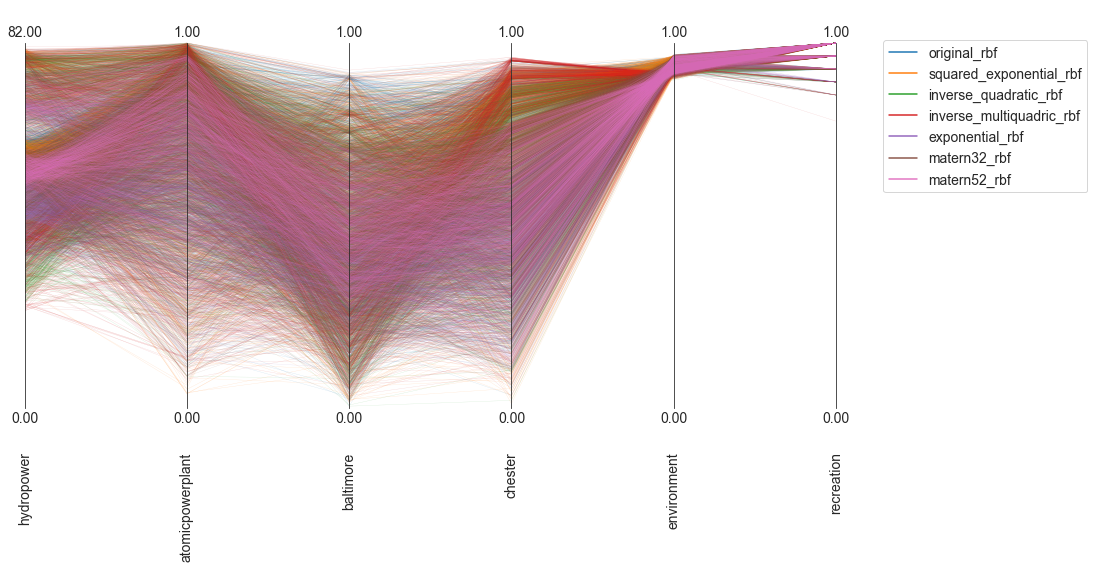

In [4]:
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0, 0, 0, 0, 0, 0]
limits.loc[1] = [82, 1, 1, 1, 1, 1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=0.3, color=c, alpha=0.2)

axes.legend()

# plt.show()

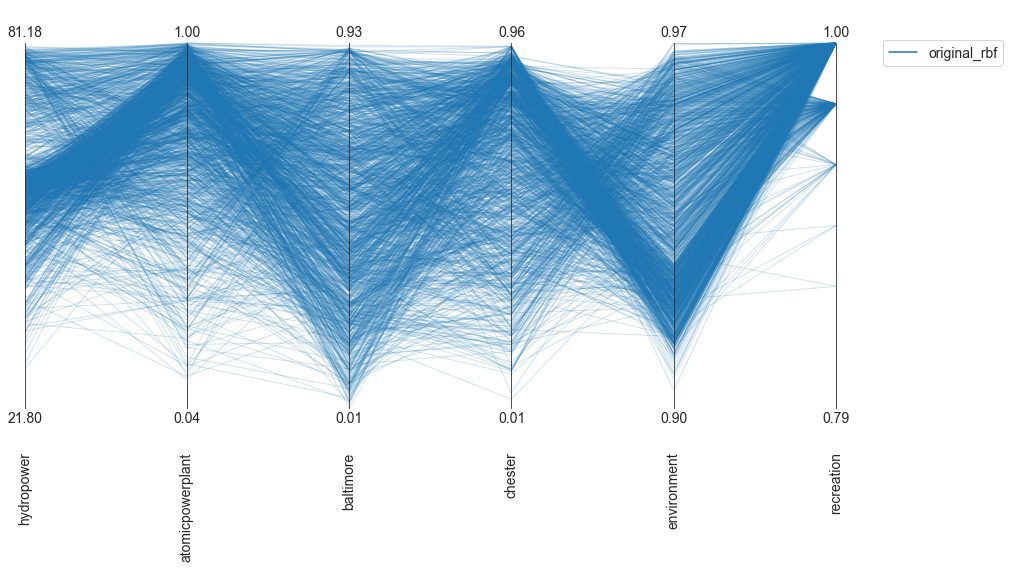

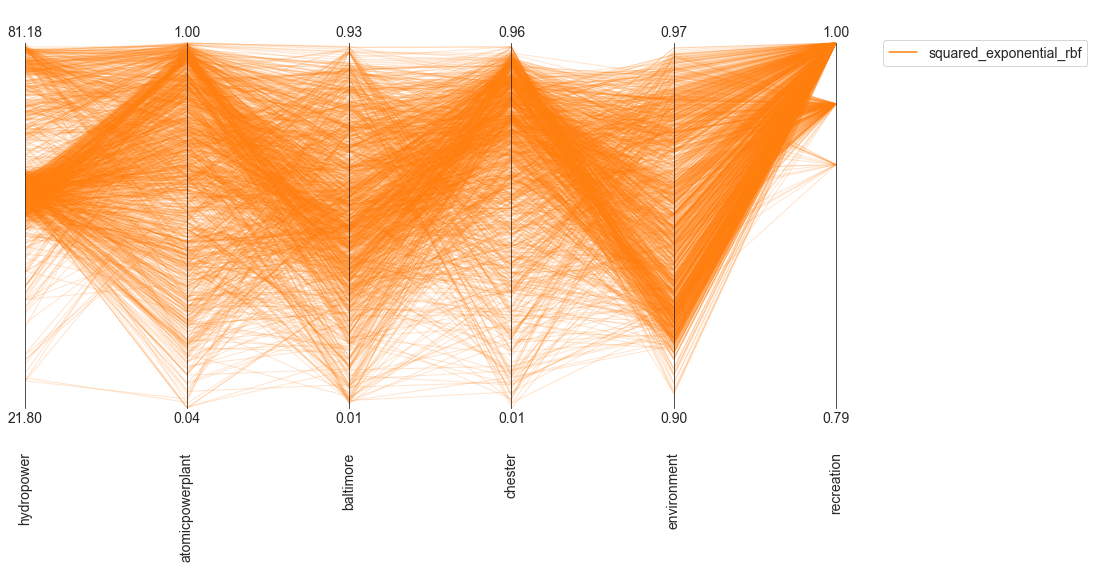

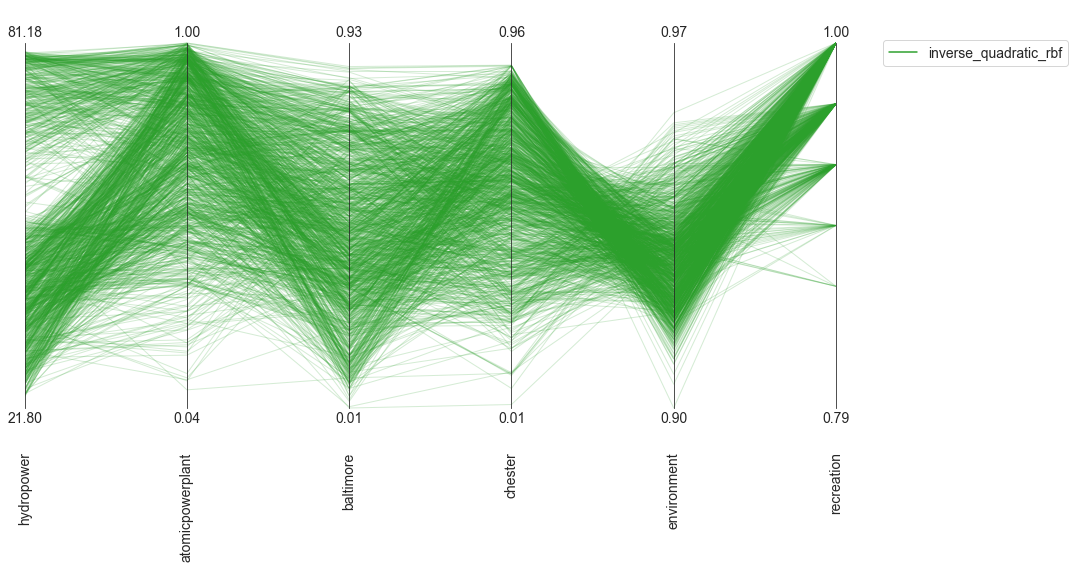

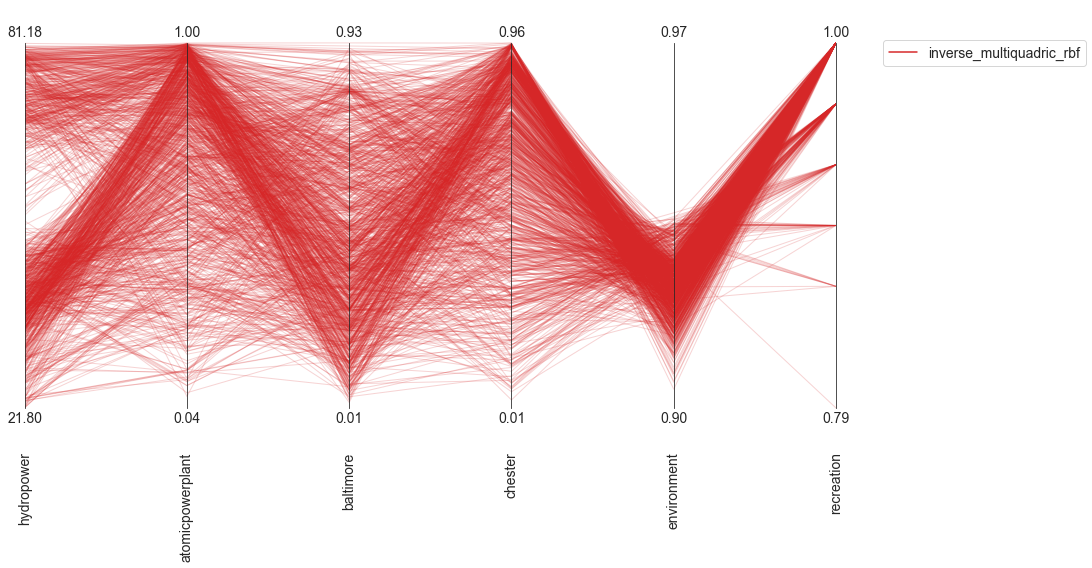

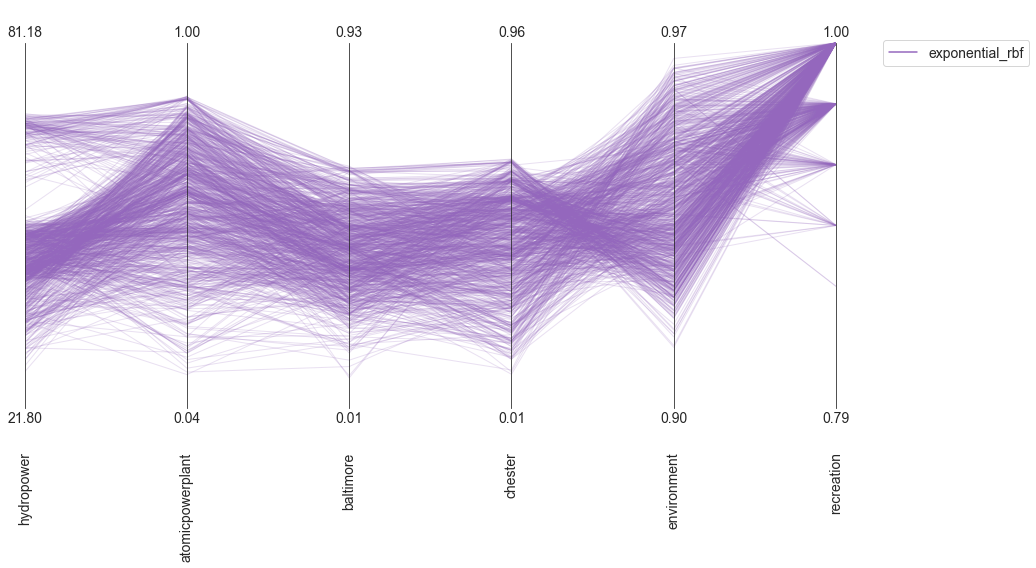

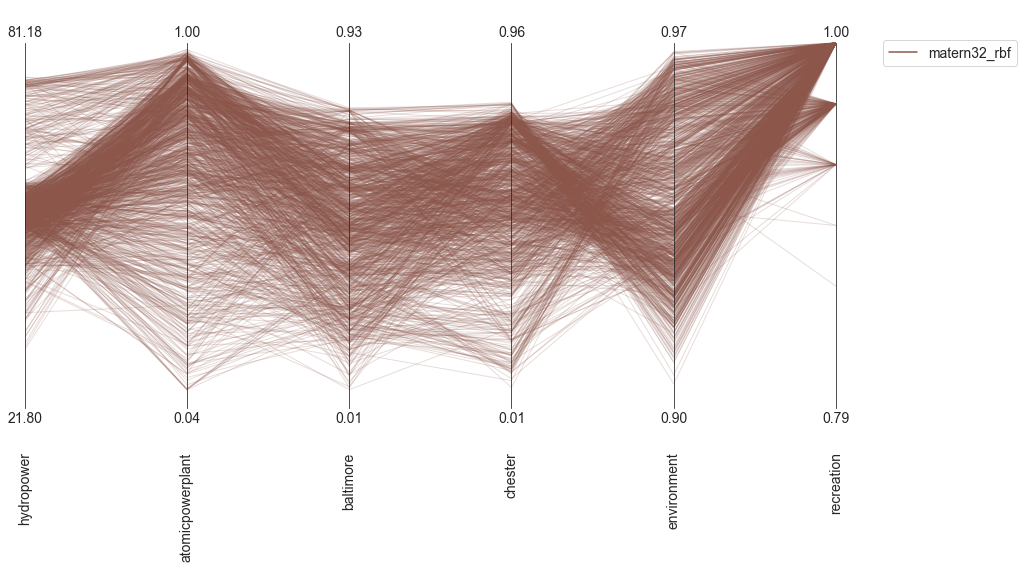

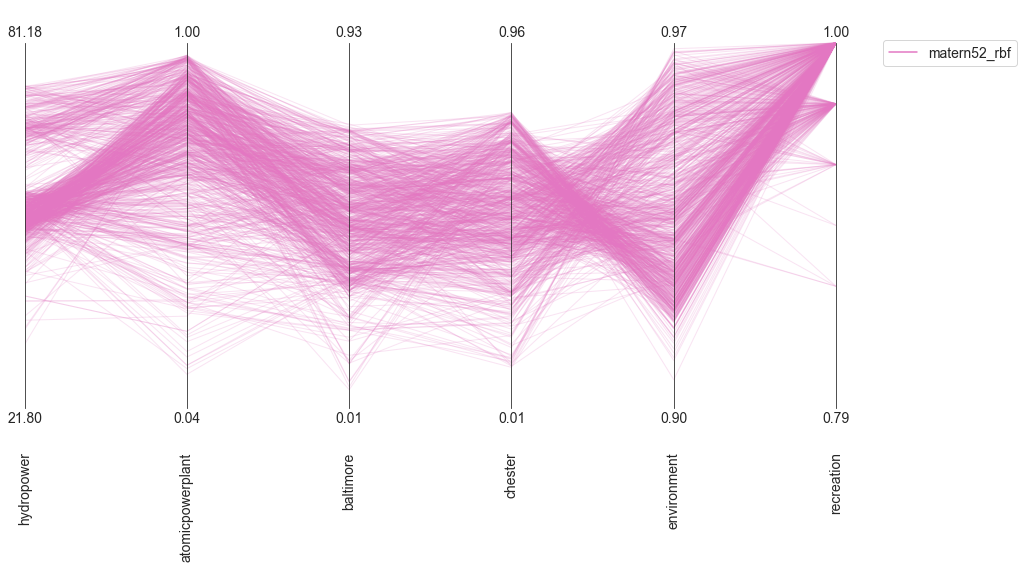

In [5]:
limits = get_limits(pd.concat(pareto_sets.values()))

for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits)
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)
    axes.legend()

plt.show()

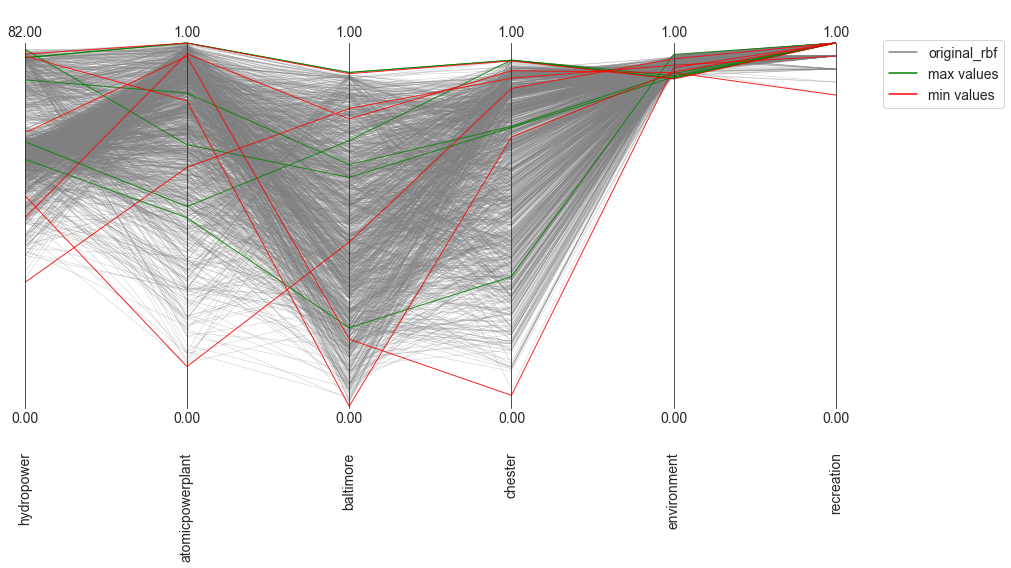

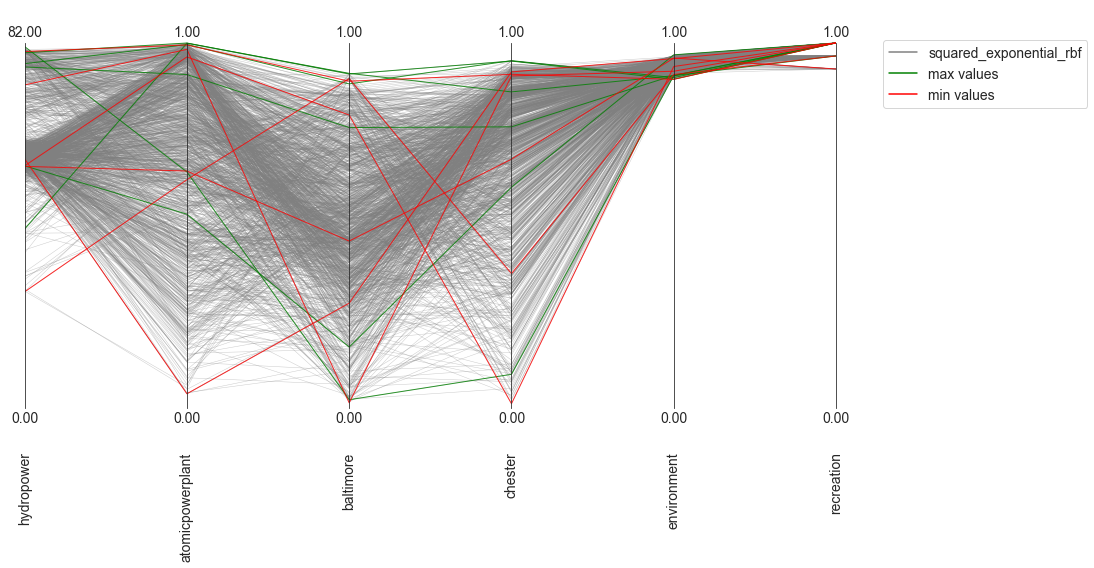

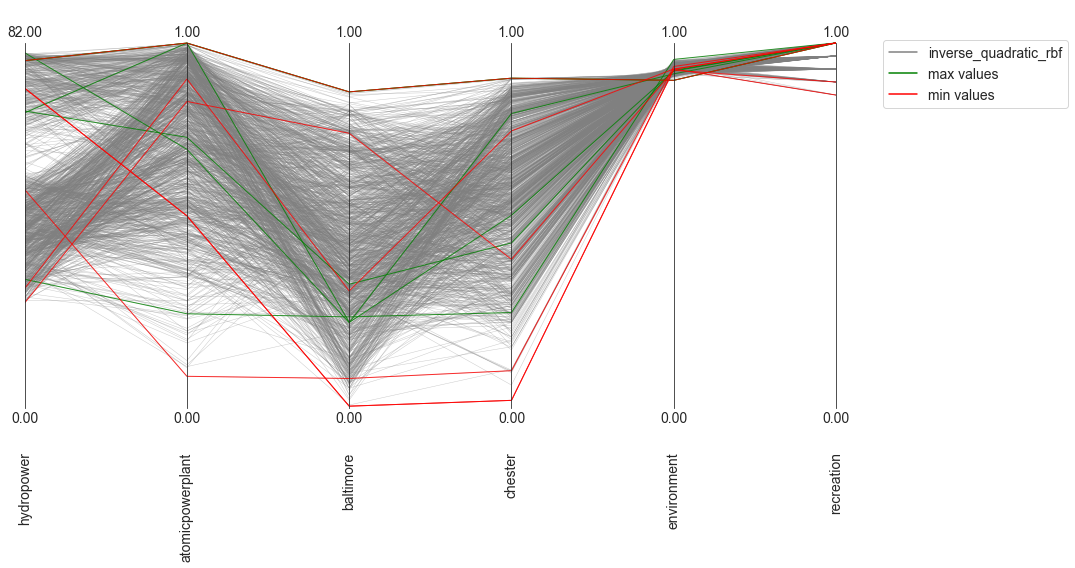

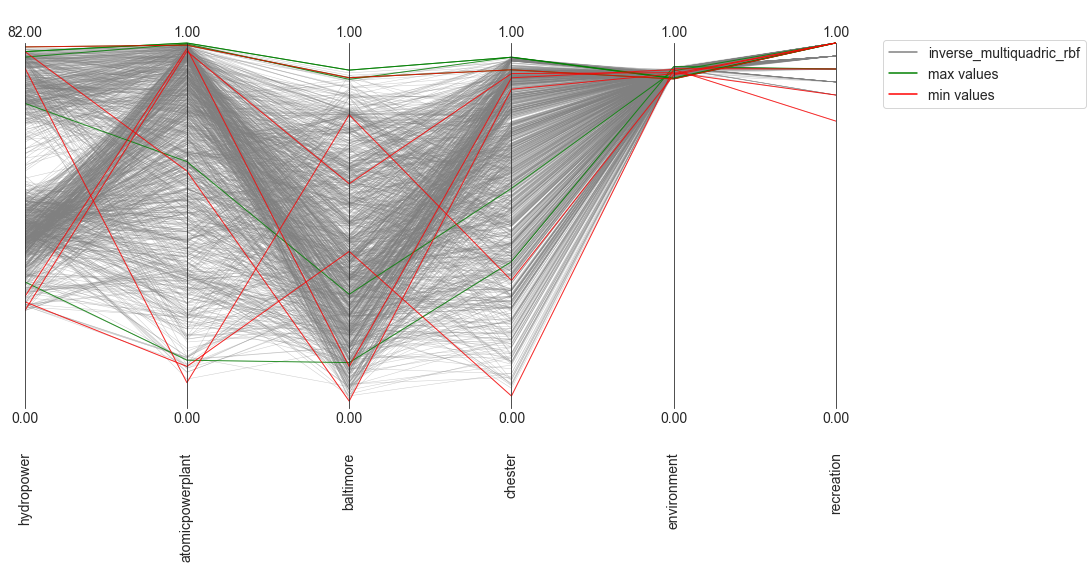

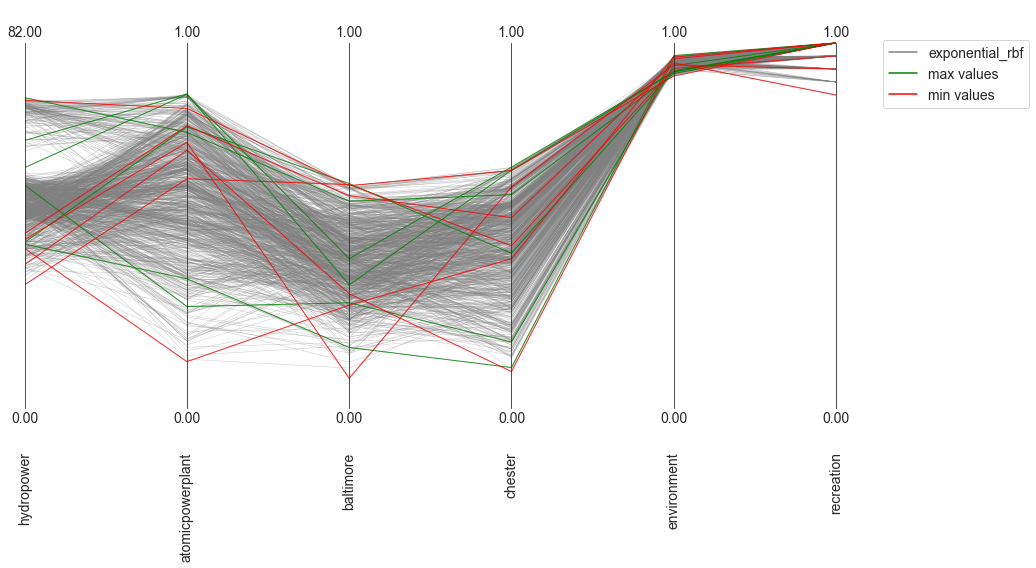

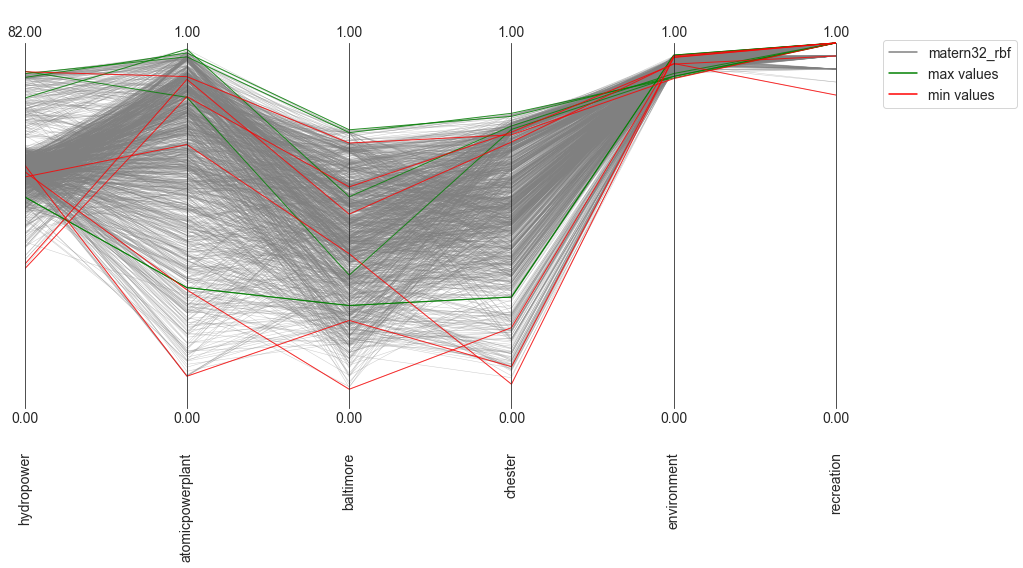

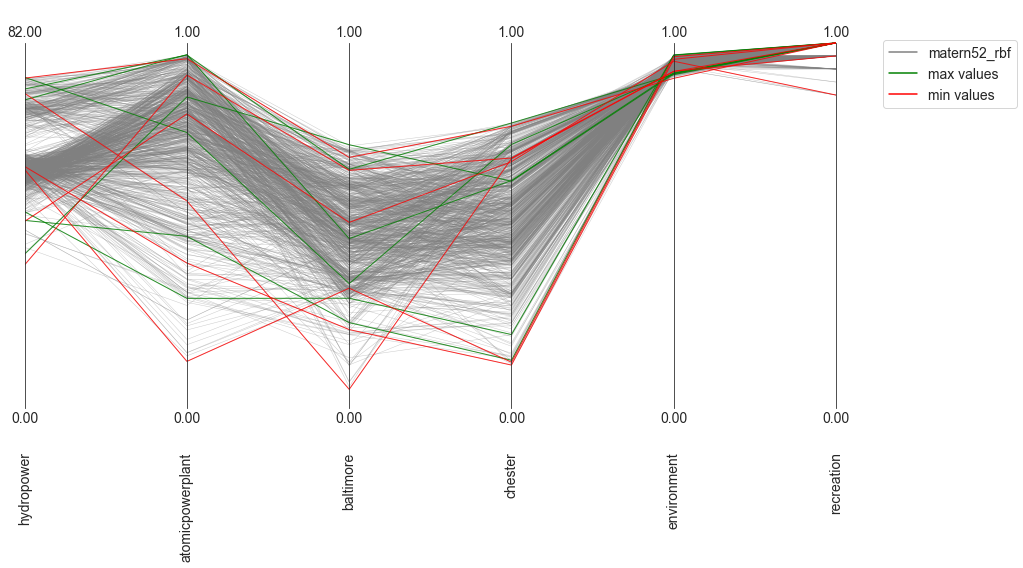

In [6]:
for entry in rbfs:
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    df_max = pd.DataFrame(columns=df_rbf.columns)
    df_min = pd.DataFrame(columns=df_rbf.columns)
    for i in df_rbf.idxmax():
        df_max = df_max.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        df_min = df_min.append(df_rbf.loc[i])

    limits = get_limits(df_rbf)
    limits.loc[0] = [0, 0, 0, 0, 0, 0]
    limits.loc[1] = [82, 1, 1, 1, 1, 1]
    axes = ParallelAxes(limits)
    axes.plot(df_rbf, label=name, lw=0.5, color="grey", alpha=0.4)
    axes.plot(df_max, label="max values", lw=1, color="green", alpha=0.8)
    axes.plot(df_min, label="min values", lw=1, color="red", alpha=0.8)
    axes.legend()
    plt.savefig(f"figs/{name}/{name}_parcoords.jpg")
    plt.show()

In [7]:
for k, v in pareto_sets.items():
    v["rbf"] = k

combined = pd.concat(pareto_sets.values())
combined.head()

hydropower  atomicpowerplant  baltimore   chester  environment  recreation  \
0   73.703711          0.862714   0.666536  0.771407     0.916151         1.0   
1   71.338386          0.841340   0.459287  0.553534     0.921845         1.0   
2   76.572454          0.931601   0.676782  0.755022     0.913485         1.0   
3   64.625256          0.692799   0.419601  0.611561     0.925108         1.0   
4   75.387023          0.889018   0.452169  0.853073     0.918153         1.0   

            rbf  
0  original_rbf  
1  original_rbf  
2  original_rbf  
3  original_rbf  
4  original_rbf

In [8]:
combined.columns

Index(['hydropower', 'atomicpowerplant', 'baltimore', 'chester', 'environment',
       'recreation', 'rbf'],
      dtype='object')

<AxesSubplot:xlabel='rbf', ylabel='hydropower'>

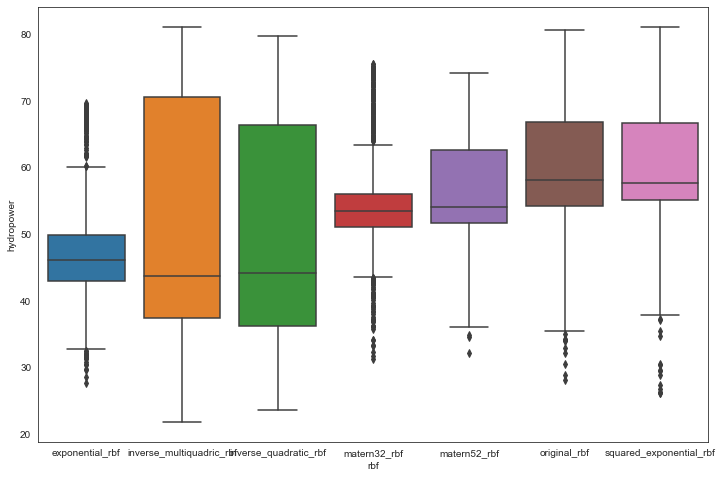

In [23]:
data = combined[["hydropower", "rbf"]]
data.head()

sns.boxplot(data=data, y="hydropower", x="rbf", order=sorted(data.rbf.unique()))

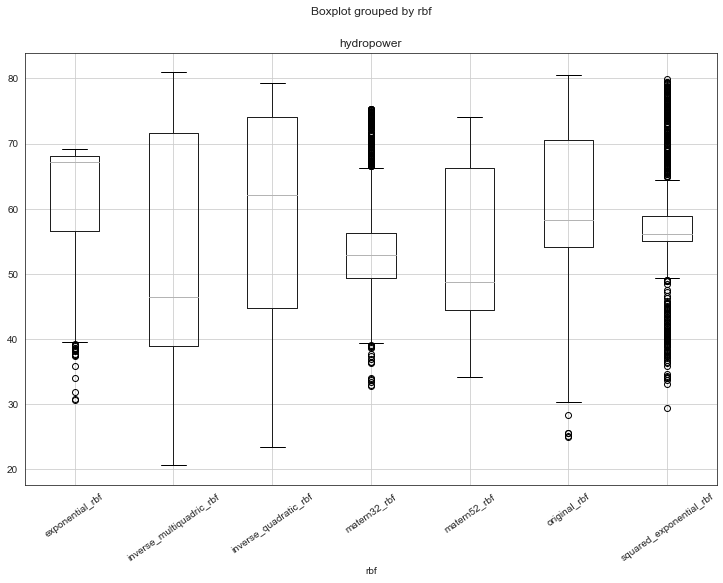

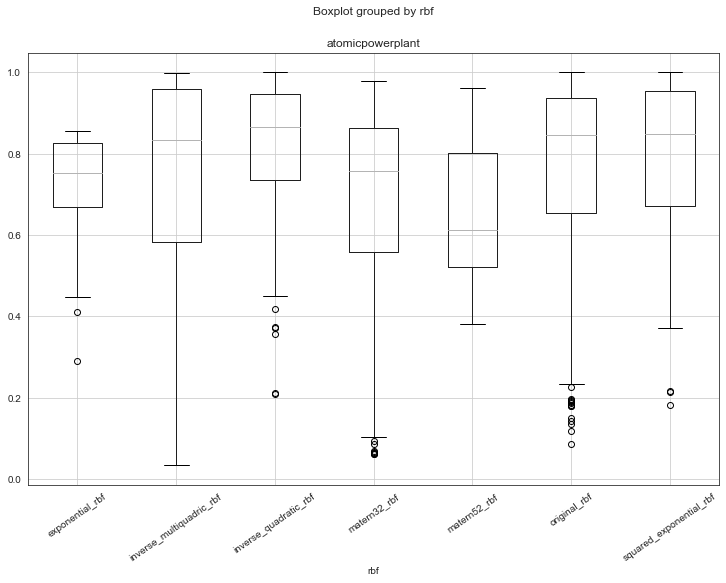

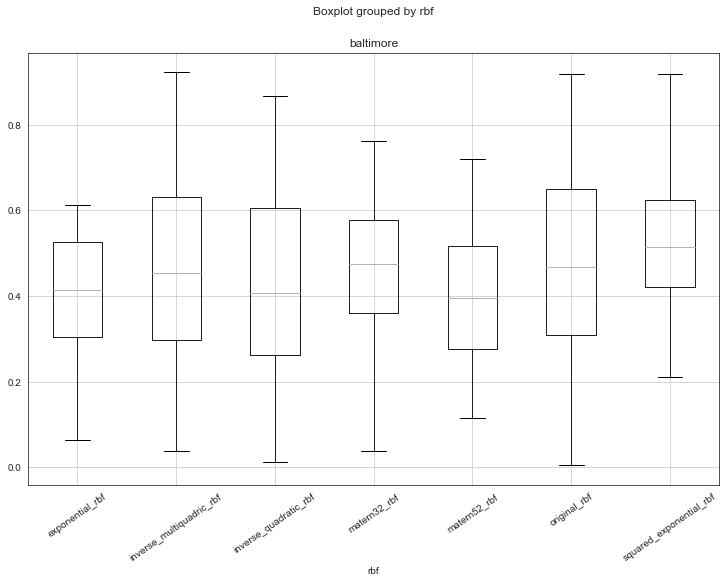

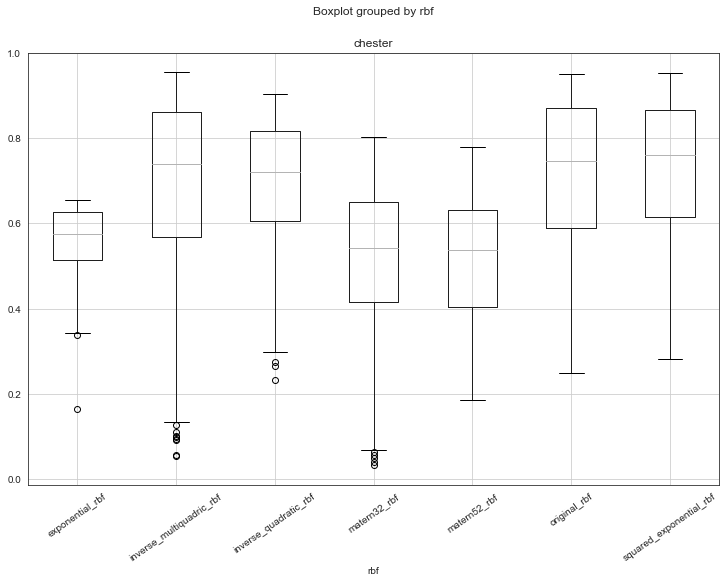

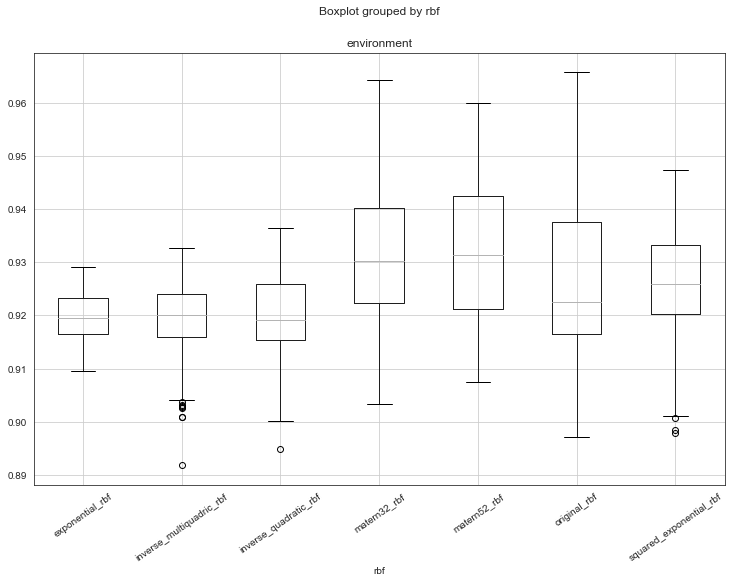

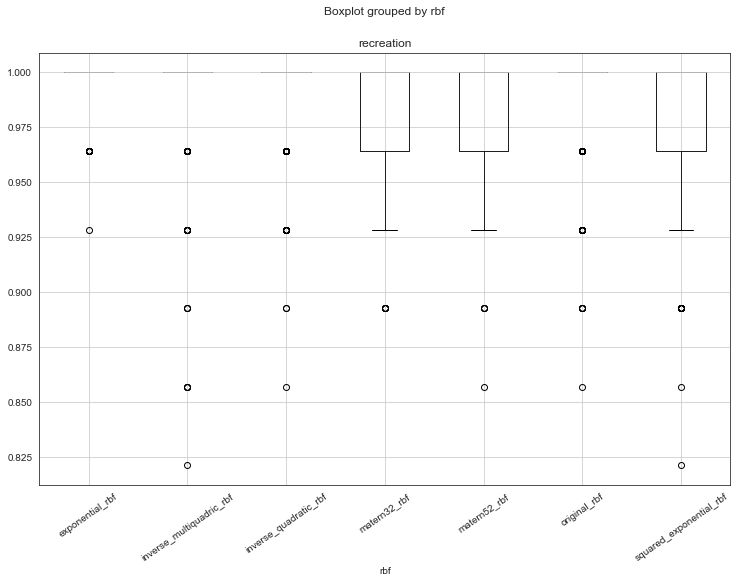

In [9]:
for entry in combined.columns[0:-1]:
    combined.boxplot(column=entry, by="rbf", rot=35)
    # plt.savefig(f'figs/by_objective/{entry}_boxplot.jpg')
plt.show()

In [38]:
# for entry in rbfs:
#     name = entry.__name__
#     boxp = pareto_sets[name].copy()
#     boxp['hydropower'] = boxp['hydropower']/100
#     sns.boxplot(     data=boxp,
#                      width=0.5,
#                      palette="colorblind")
#     plt.title(name)
#     plt.suptitle("")
#     plt.xlabel("")
#     plt.ylabel("Reliability")
#     plt.show()

# for entry in combined.columns[0:-1]:

for da in combined.groupby(by="rbf"):
    sns.boxplot(data=da[da.columns[0:-1]], width=0.5, palette="colorblind")
    #     plt.title(name)
    plt.suptitle("")
    plt.xlabel("")
    plt.ylabel("Reliability")
    plt.show()

AttributeError: 'tuple' object has no attribute 'columns'

In [43]:
c = combined.groupby(by="rbf")
for i in c:
    print(i)

('exponential_rbf',      hydropower  atomicpowerplant  baltimore   chester  environment  \
0     66.865551          0.750249   0.552100  0.597250     0.917301   
1     61.616907          0.772150   0.391809  0.398747     0.924224   
2     67.632337          0.777920   0.604276  0.624255     0.914102   
3     67.743557          0.835102   0.580597  0.629320     0.915172   
4     66.707739          0.524664   0.299408  0.437751     0.925519   
..          ...               ...        ...       ...          ...   
190   40.448603          0.678901   0.180255  0.428899     0.926176   
191   67.150413          0.410259   0.324084  0.650011     0.917274   
192   40.547229          0.705604   0.136284  0.429291     0.928601   
193   39.643811          0.685687   0.107212  0.455175     0.927441   
194   40.536468          0.690335   0.133451  0.458029     0.925846   

     recreation              rbf  
0      1.000000  exponential_rbf  
1      1.000000  exponential_rbf  
2      1.000000  expon